In [28]:
import pandas as pd
#baca data
data=pd.read_csv("C:/Users/User/Documents/Extended_Employee_Performance_and_Productivity_Data.csv")
data.head()


,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [27]:
from matplotlib import pyplot as plt

In [10]:
print(data['Job_Title'].unique().tolist())

['Specialist', 'Developer', 'Analyst', 'Manager', 'Technician', 'Engineer', 'Consultant']


<Axes: >

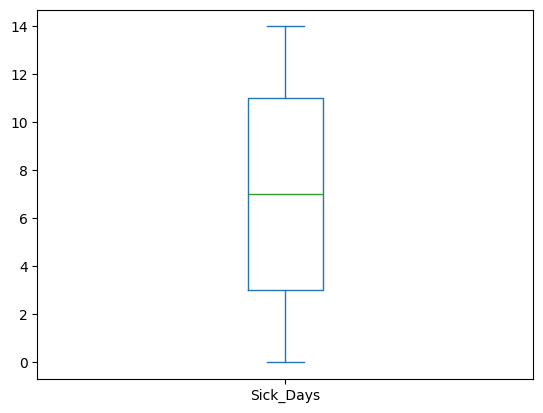

In [11]:
data['Sick_Days'].plot(kind='box')

In [12]:
#membuat fungsi untuk plot histogram
def plot_hist(x,y):
    y.hist(x,alpha=0.7,rwidth=0.9,color='skyblue')
    direct=['top','bottom','right']
    for i in direct: #menonaktifkan sumbu
        y.spines[i].set_visible(False)
    y.xaxis.set_visible(False)
    y.set_title(x.name,fontsize=10,color='skyblue',fontweight='bold')
    y.set_yticklabels([])

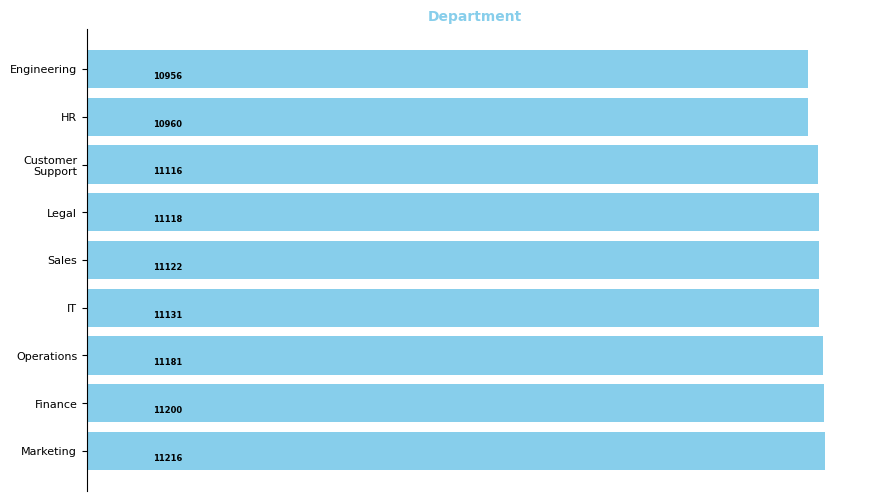

In [13]:
#membuat fungsi untuk membuat plot horizontal bar
def plot_barh(x,y):
    hitung=x.value_counts()
    if x.dtypes=='int':
        hit=hitung.sort_index()
        ykor=[(i/10)+0.02 for i in range(len(hit.index))]
        br=y.barh(ykor,hitung.values,height=0.08,color='skyblue')
    else:
        ykor=[(i/10)+0.02 for i in range(len(hitung.index))]
        br=y.barh(ykor,hitung.values,height=0.08,color='skyblue')
    y.set_yticks(ykor)
    ylabel=[]
    if x.dtypes!='int':
        for i in hitung.index:
            if len(i.split())>1: #jika nama lebih dari 1 kata
                word=i.split()
                gab="\n".join(word)#antara 2 kata dipisah dengan \n
                ylabel.append(gab)
            else:
                ylabel.append(i)
    else:
        ylabel=hit.index
    y.set_yticklabels(ylabel,fontsize=8)
    direct=['top','bottom','right']
    for i in direct:
        y.spines[i].set_visible(False)
    for i,j in zip(ykor,hitung.values):
        y.text(1000,i-0.02,f'{j}',fontweight='bold',fontsize=6)
    y.xaxis.set_visible(False)
    y.set_title(x.name,fontsize=10,color='skyblue',fontweight='bold')
fig,ax1=plt.subplots(figsize=(10,6))
plot_barh(data['Department'],ax1)

dari hasil horizontal plot diatas, department marketing memiliki jumlah pekerja paling banyak dalam perusahaan tersebut

In [14]:
#x harus format pandas series dalam fungsi
def plot_pie(x,y):
    #x harus format pandas seres
    hitung=x.value_counts()
    value=hitung.values
    idx=hitung.index
    y.pie(value,labels=idx,wedgeprops=dict(width=0.3))
    y.set_title(x.name,fontsize=10,color='skyblue',fontweight='bold')

C:\Users\User\AppData\Local\Temp\ipykernel_11332\2351255284.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_lb_3.text(0.58,0.55,f'{hitung_stat[0]}',fontsize=36,fontweight='bold',color='skyblue')
C:\Users\User\AppData\Local\Temp\ipykernel_11332\2351255284.py:60: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax_lb_3.text(0.58,0.15,f'{hitung_stat[1]}',fontsize=36,fontweight='bold',color='skyblue')


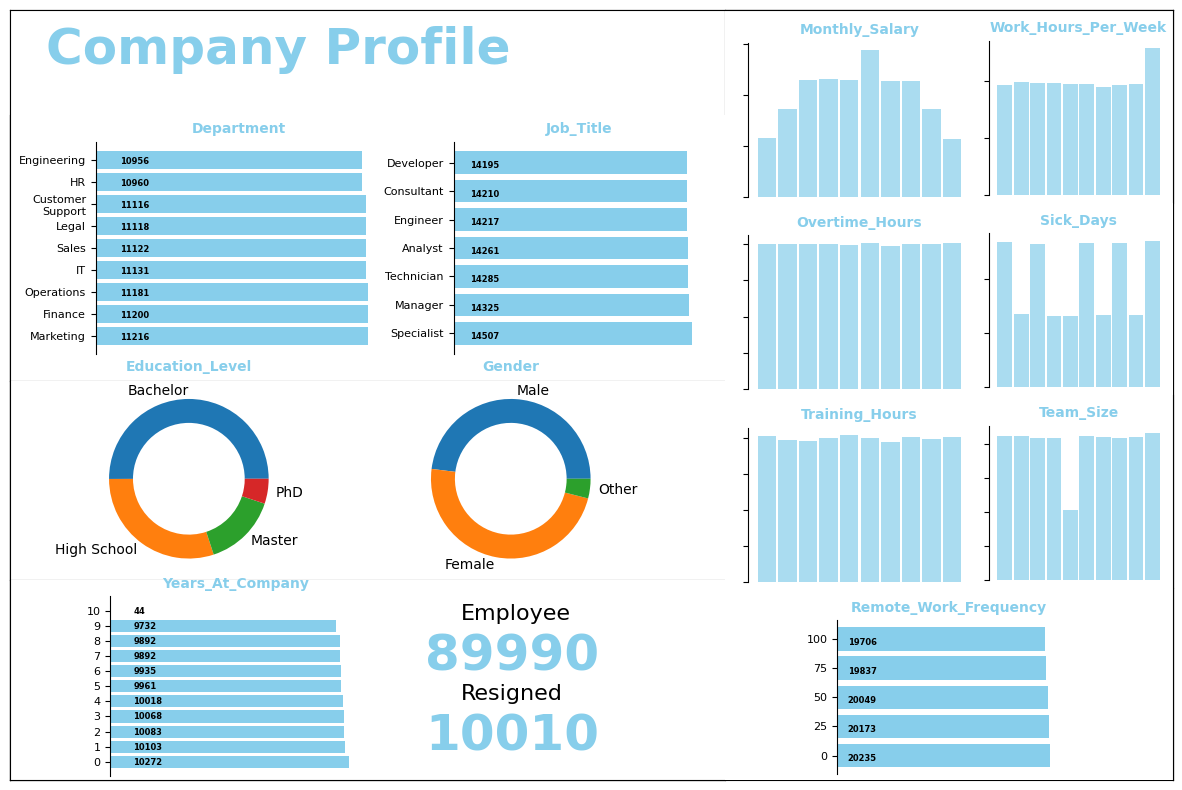

In [15]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib.gridspec as gridspec
fig,ax=plt.subplots(figsize=(15,10))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
gs_whole=gridspec.GridSpec(1,2,width_ratios=[0.8,0.5],wspace=0)
left_box=fig.add_subplot(gs_whole[0])
left_box.spines['bottom'].set_visible(False)
left_box.xaxis.set_visible(False)
left_box.yaxis.set_visible(False)
left_box.text(0.05,0.93,'Company Profile',color='skyblue',fontsize=36,fontweight='bold')
gs_inner_lb=gridspec.GridSpecFromSubplotSpec(2,1,subplot_spec=gs_whole[0],height_ratios=[0.05,0.95])
gs_inner_lb_1=fig.add_subplot(gs_inner_lb[1])
gs_inner_lb_1.spines['top'].set_visible(False)
gs_inner_lb_1.spines['right'].set_visible(False)
gs_inner_lb_1.xaxis.set_visible(False)
gs_inner_lb_1.yaxis.set_visible(False)


gs_inner_lb_1_inner=gridspec.GridSpecFromSubplotSpec(3,1,subplot_spec=gs_inner_lb[1],height_ratios=[0.4,0.3,0.3],hspace=0)

ax_lb_1=fig.add_subplot(gs_inner_lb_1_inner[0])
axse=ax_lb_1.inset_axes([0.12,0.1,0.4,0.8])
plot_barh(data['Department'],axse)
ax_lb_1.spines['right'].set_visible(False)
ax_lb_1.spines['top'].set_visible(False)
ax_lb_1.xaxis.set_visible(False)
ax_lb_1.yaxis.set_visible(False)

axse_1=ax_lb_1.inset_axes([0.62,0.1,0.35,0.8])
plot_barh(data['Job_Title'],axse_1)

ax_lb_2=fig.add_subplot(gs_inner_lb_1_inner[1])
axse_21=ax_lb_2.inset_axes([0.05,0.01,0.4,1])
plot_pie(data['Education_Level'],axse_21)
ax_lb_2.spines['right'].set_visible(False)
ax_lb_2.spines['top'].set_visible(False)
ax_lb_2.xaxis.set_visible(False)
ax_lb_2.yaxis.set_visible(False)


axse_22=ax_lb_2.inset_axes([0.5,0.01,0.4,1])
plot_pie(data['Gender'],axse_22)

ax_lb_3=fig.add_subplot(gs_inner_lb_1_inner[2])
axse_31=ax_lb_3.inset_axes([0.14,0.02,0.35,0.9])
plot_barh(data['Years_At_Company'],axse_31)
ax_lb_3.spines['right'].set_visible(False)
ax_lb_3.spines['top'].set_visible(False)
ax_lb_3.xaxis.set_visible(False)
ax_lb_3.yaxis.set_visible(False)


hitung_stat=data['Resigned'].value_counts()
ax_lb_3.text(0.63,0.8,'Employee',fontsize=16)
ax_lb_3.text(0.58,0.55,f'{hitung_stat[0]}',fontsize=36,fontweight='bold',color='skyblue')
ax_lb_3.text(0.63,0.4,'Resigned',fontsize=16)
ax_lb_3.text(0.58,0.15,f'{hitung_stat[1]}',fontsize=36,fontweight='bold',color='skyblue')

right_box=fig.add_subplot(gs_whole[1])
gs_inner_rb=gridspec.GridSpecFromSubplotSpec(4,1,subplot_spec=gs_whole[1],height_ratios=[0.25 for i in range(4)],hspace=0)
ax_rb_0=fig.add_subplot(gs_inner_rb[0])
right_box.spines['left'].set_visible(False)
right_box.spines['bottom'].set_visible(False)
ax_rb_0.spines['bottom'].set_visible(False)
ax_rb_0.spines['left'].set_visible(False)
right_box.xaxis.set_visible(False)
right_box.yaxis.set_visible(False)
ax_rb_0.xaxis.set_visible(False)
ax_rb_0.yaxis.set_visible(False)

ax_rb_0_inner_1=ax_rb_0.inset_axes([0.05,0.03,0.5,0.8])
plot_hist(data['Monthly_Salary'],ax_rb_0_inner_1)


ax_rb_0_inner_2=ax_rb_0.inset_axes([0.59,0.04,0.4,0.8])
plot_hist(data['Work_Hours_Per_Week'],ax_rb_0_inner_2)

ax_rb_1=fig.add_subplot(gs_inner_rb[1])
ax_rb_1.spines['bottom'].set_visible(False)
ax_rb_1.spines['left'].set_visible(False)
ax_rb_1.spines['top'].set_visible(False)
ax_rb_1.xaxis.set_visible(False)
ax_rb_1.yaxis.set_visible(False)

ax_rb_1_inner_1=ax_rb_1.inset_axes([0.05,0.03,0.5,0.8])
plot_hist(data['Overtime_Hours'],ax_rb_1_inner_1)
ax_rb_1_inner_2=ax_rb_1.inset_axes([0.59,0.04,0.4,0.8])
plot_hist(data['Sick_Days'],ax_rb_1_inner_2)
ax_rb_1.spines['left'].set_visible(False)
ax_rb_1.spines['right'].set_visible(False)

ax_rb_2=fig.add_subplot(gs_inner_rb[2])
ax_rb_2.spines['bottom'].set_visible(False)
ax_rb_2.spines['left'].set_visible(False)
ax_rb_2.spines['top'].set_visible(False)
ax_rb_2.xaxis.set_visible(False)
ax_rb_2.yaxis.set_visible(False)

ax_rb_2_inner_1=ax_rb_2.inset_axes([0.05,0.03,0.5,0.8])
plot_hist(data['Training_Hours'],ax_rb_2_inner_1)
ax_rb_2_inner_2=ax_rb_2.inset_axes([0.59,0.04,0.4,0.8])
plot_hist(data['Team_Size'],ax_rb_2_inner_2)

ax_rb_3=fig.add_subplot(gs_inner_rb[3])
ax_rb_3.spines['bottom'].set_visible(False)
ax_rb_3.spines['left'].set_visible(False)
ax_rb_3.spines['top'].set_visible(False)
ax_rb_3.xaxis.set_visible(False)
ax_rb_3.yaxis.set_visible(False)

ax_rb_3_inner_1=ax_rb_3.inset_axes([0.25,0.03,0.5,0.8])
plot_barh(data['Remote_Work_Frequency'],ax_rb_3_inner_1)


box plot + jitter (random koordinat agar mudah dilihat data point pada boxplot

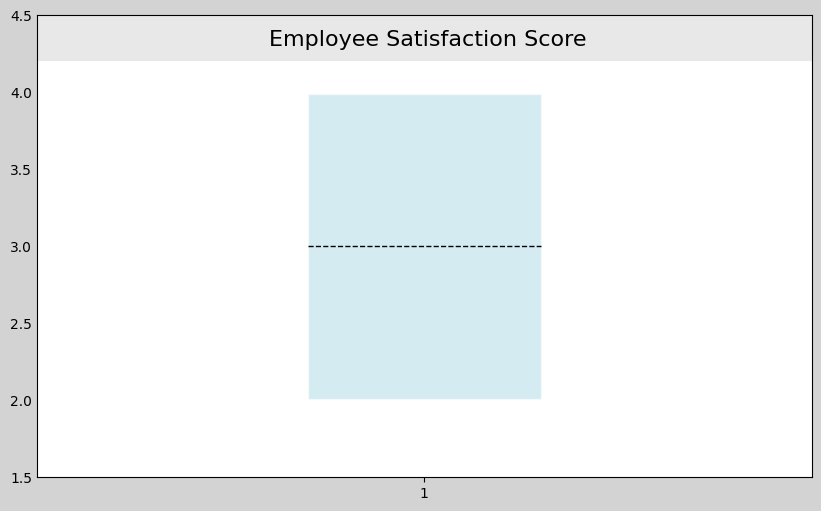

In [96]:
from matplotlib import pyplot as plt
fig,ax=plt.subplots(figsize=(10,6))
#patch_artist true aga dapat dicustom boxplotnya
box=ax.boxplot(data['Employee_Satisfaction_Score'],patch_artist=True,widths=0.3,flierprops=dict(marker='o'))
#plt.setp is a function in Matplotlib that allows you to set properties of artists (e.g., lines, patches, text) in a plot.
for i in ['whiskers','caps']:
    plt.setp(box[i],visible=False)
#mengatur style
plt.setp(box['boxes'],facecolor='lightblue',edgecolor='white',alpha=0.5)
plt.setp(box['medians'],color='black',linestyle='--')
#mengatur ylim
ax.set_ylim(1.5,4.5)
ax.tick_params(axis='y',length=0)
fig.set_facecolor('lightgray')
ax.text(0.8,4.3,'Employee Satisfaction Score',fontsize=16)
#horizntal span dari y=4.2 to 4.5
ax.axhspan(4.2,4.5,facecolor='lightgrey',alpha=0.5)
import numpy as np
random=[]
for i in range(len(data)):
    rand=np.random.uniform([0.5,1.4])
